# Análise do Desempenho da AA Tree com outras Estruturas de Busca

### PPGCC - Programa de Pós-Graduação em Ciência da Computação
#### UNIFESP - Universidade Federal de São Paulo
#### São José dos Campos, São Paulo, Brasil

In [34]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt  
plt.style.use('fivethirtyeight')

In [35]:
# carregando dataset
df = pd.read_csv('dataset/all_searches.csv', sep=',', index_col='id')

In [36]:
df.head()

,user_name,type_action,type_search,mode_vector,len_vector,mean_time,std_time,mean_compare,std_compare
id,,,,,,,,,
0,aline,insert,BinarySearch,Arranjos Ordenados (ASC),100,0.000005,0.000013,1.00,0.000000
1,aline,search,BinarySearch,Arranjos Ordenados (ASC),100,0.000004,0.000004,10.60,2.651472
2,aline,remove,BinarySearch,Arranjos Ordenados (ASC),100,0.000009,0.000006,8.82,2.362929
3,aline,insert,BinarySearch,Arranjos Ordenados (ASC),10,0.000015,0.000024,1.00,0.000000
4,aline,insert,BinarySearch,Arranjos Ordenados (ASC),1000,0.000002,0.000007,1.00,0.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 71
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_name     404 non-null    object 
 1   type_action   404 non-null    object 
 2   type_search   404 non-null    object 
 3   mode_vector   404 non-null    object 
 4   len_vector    404 non-null    int64  
 5   mean_time     404 non-null    float64
 6   std_time      404 non-null    float64
 7   mean_compare  404 non-null    float64
 8   std_compare   404 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 31.6+ KB


In [38]:
df.shape

(404, 9)

In [40]:
# setando arranjos e tamanhos
modes = list(df['mode_vector'].unique())
len_vector = sorted(list(df['len_vector'].unique()))
actions = list(df['type_action'].unique())

## Desempenho AA Tree

In [41]:
def plot_result_aatree(x, title='', label='', action=''):
    data =  df[(df['type_search'] == 'AATree') & (df['type_action'] == action)]
    data = data.pivot(index='len_vector', columns='mode_vector').stack().reset_index()
    
    fig, ax = plt.subplots() 
    fig.set_size_inches(7, 3.5)
    
    colors = ['red', 'blue', 'green', 'orange']
    positions = [0, 1, 2, 3]

    for group, color, pos in zip(data.groupby('mode_vector'), colors, positions):
        key, group = group
        group.plot('len_vector', 'mean_' + x, yerr='std_' + x, kind='bar', width=0.2, label=key, 
                    position=pos, color=color, alpha=0.6, ax=ax)  
        
    plt.ylabel(label, fontsize=12)
    plt.xlabel('') 
    plt.legend(loc='upper left', prop={"size":12})
    ax.set_xlim(-1, 5.3)  

    plt.savefig(f"graphics/aa_tree_{x}_{action}.png", format='png', bbox_inches='tight')

In [42]:
def plot_result_aatree_mean(x, label='', action=''):
    plt.figure(figsize=(6, 3))
    legend = []

    for mode in modes:
        data = df[(df['mode_vector'] == mode) & 
                    (df['type_search'] == 'AATree') &
                    (df['type_action'] == action)].sort_values(by=['len_vector'])
        legend.append(mode)
        plt.plot(len_vector, data['mean_' + x], marker='o', linewidth=2)
        
        #plt.xticks(len_vector)
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) 
        
        plt.xlabel('arranjos (10, 100, 1.000, 10.000, 100.000, 1.000.000)', fontsize=12)
        plt.ylabel(label, fontsize=12) 
        plt.legend(legend, loc='best', prop={"size":12})

    plt.savefig(f"graphics/aa_tree_mean_{x}_{action}.png", format='png')

### Comparações entre nós

Inserção

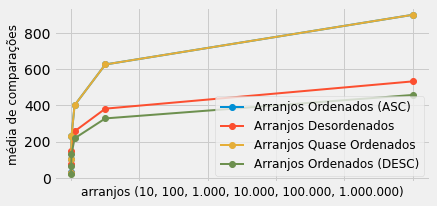

In [43]:
plot_result_aatree_mean('compare', 'média de comparações', 'insert')

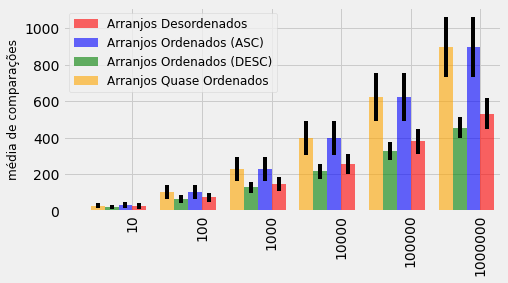

In [44]:
plot_result_aatree('compare', '', 'média de comparações', 'insert')

Busca

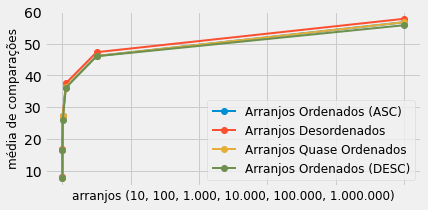

In [45]:
plot_result_aatree_mean('compare', 'média de comparações', 'search')

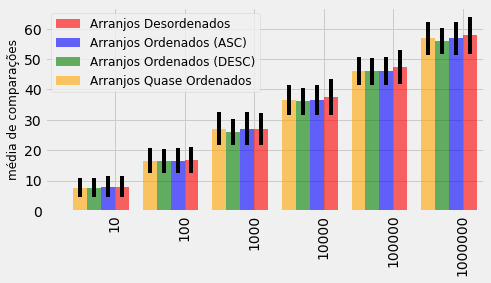

In [46]:
plot_result_aatree('compare', '', 'média de comparações', 'search')

Remoção

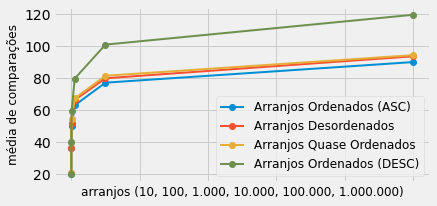

In [47]:
plot_result_aatree_mean('compare', 'média de comparações', 'remove')

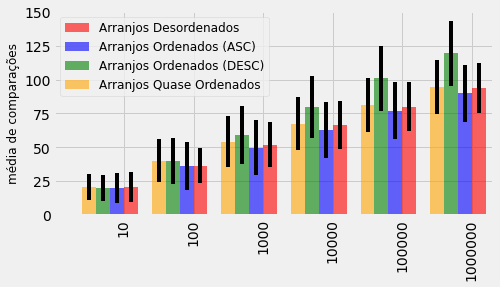

In [48]:
plot_result_aatree('compare', '', 'média de comparações', 'remove')

### Tempo de Processamento

Inserção

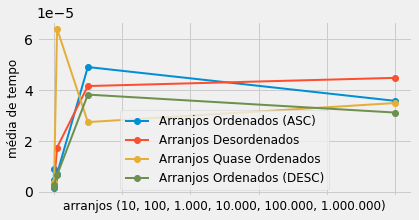

In [49]:
plot_result_aatree_mean('time', 'média de tempo', 'insert')

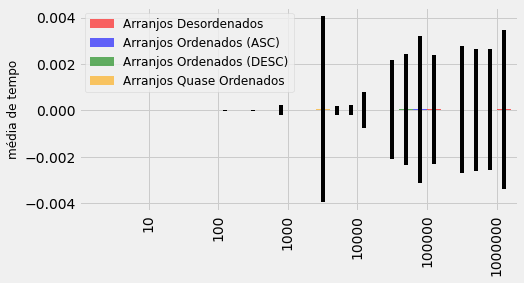

In [50]:
plot_result_aatree('time', '', 'média de tempo', 'insert')

Busca

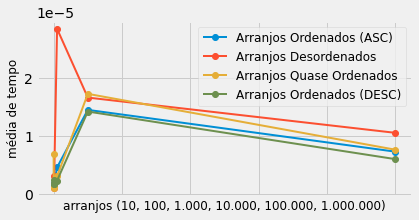

In [51]:
plot_result_aatree_mean('time', 'média de tempo', 'search')

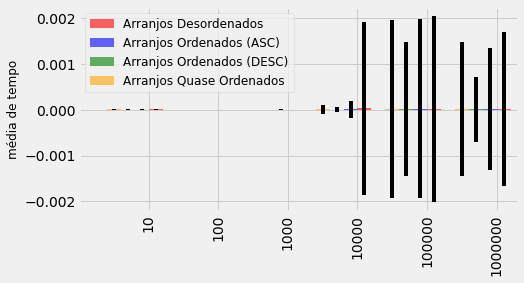

In [52]:
plot_result_aatree('time', '', 'média de tempo', 'search')

Remoção

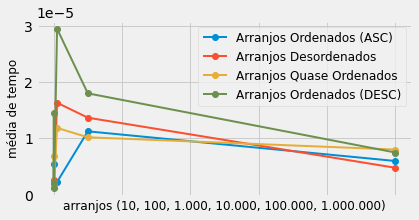

In [53]:
plot_result_aatree_mean('time', 'média de tempo', 'remove')

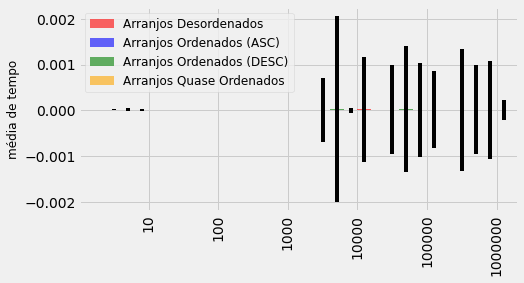

In [54]:
plot_result_aatree('time', '', 'média de tempo', 'remove')

### Média das Métricas

Inserção

In [321]:
df[(df['type_search'] == 'AATree') & (df['type_action'] == 'insert')] \
    .groupby(by=['type_search', 'mode_vector'], as_index=False) \
    .agg({"mean_compare": "mean", "mean_time": "mean"})

,type_search,mode_vector,mean_compare,mean_time
0,AATree,Arranjos Desordenados,236.275112,0.000019
1,AATree,Arranjos Ordenados (ASC),381.039462,0.000018
2,AATree,Arranjos Ordenados (DESC),202.707667,0.000014
3,AATree,Arranjos Quase Ordenados,380.676031,0.000023


Busca

In [322]:
df[(df['type_search'] == 'AATree') & (df['type_action'] == 'search')] \
    .groupby(by=['type_search', 'mode_vector'], as_index=False) \
    .agg({"mean_compare": "mean", "mean_time": "mean"})

,type_search,mode_vector,mean_compare,mean_time
0,AATree,Arranjos Desordenados,32.439783,0.000010
1,AATree,Arranjos Ordenados (ASC),31.843463,0.000005
2,AATree,Arranjos Ordenados (DESC),31.345502,0.000005
3,AATree,Arranjos Quase Ordenados,31.780734,0.000006


Remoção

In [323]:
df[(df['type_search'] == 'AATree') & (df['type_action'] == 'remove')] \
    .groupby(by=['type_search', 'mode_vector'], as_index=False) \
    .agg({"mean_compare": "mean", "mean_time": "mean"})

,type_search,mode_vector,mean_compare,mean_time
0,AATree,Arranjos Desordenados,58.107202,0.000007
1,AATree,Arranjos Ordenados (ASC),55.998902,0.000005
2,AATree,Arranjos Ordenados (DESC),69.882947,0.000012
3,AATree,Arranjos Quase Ordenados,59.600321,0.000007


## Desempenho AATree (LinearSearch, BinarySearch, BinarySearchTree)

In [55]:
def plot_result_not_balanced_mean(x, label='', action='', searches=[]):
    plt.figure(figsize=(13, 7))
    graphics = 1
    vector = len_vector[0:5]

    for mode in modes:
        legend = []
        plt.subplot(2 , 2, graphics)

        for search in searches:
            data = df[(df['mode_vector'] == mode) & 
                      (df['type_search'] == search) &
                      (df['type_action'] == action) &
                      (df['len_vector'] < 1000000)].sort_values(by=['len_vector'])
            legend.append(search)
            plt.subplots_adjust(hspace=0.4, wspace=0.4)
            plt.plot(vector, data['mean_' + x], marker='o', linewidth=2)
            
            plt.title(mode, fontsize=14)
            plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
            plt.xlabel('arranjos (10, 100, 1.000, 10.000, 100.000)', fontsize=12) 
            plt.ylabel(label, fontsize=12) 
            plt.legend(legend, loc='best', prop={"size":12})
        graphics +=  1

    plt.savefig(f"graphics/not_balanced_mean_{x}_{action}.png", format='png')

In [56]:
def plot_result_not_balanced(x, label='', action=''):
    for mode in modes:
        
        data =  df[(df['mode_vector'] == mode) & (df['type_action'] == action) & \
                   (df['type_search'] != 'AVLTree') & (df['type_search'] != 'ReadBlackTree') & \
                   (df['len_vector'] < 1000000)]
        
        data = data.pivot(index='len_vector', columns='type_search').stack().reset_index()
    
        fig, ax = plt.subplots() 
        fig.set_size_inches(7, 3.5)
        
        colors = ['green', 'red', 'orange', 'blue']
        positions = [0, 1, 2, 3]

        for group, color, pos in zip(data.groupby('type_search'), colors, positions):
            key, group = group
            group.plot('len_vector', 'mean_' + x, yerr='std_' + x, kind='bar', width=0.2, label=key, 
                        position=pos, color=color, alpha=0.6, ax=ax)  
        
        plt.title(mode, fontsize=14)
        plt.ylabel(label, fontsize=12)
        plt.xlabel('') 
        plt.legend(loc='upper left', prop={"size":12})
        ax.set_xlim(-1, 4.2)  

        plt.savefig(f"graphics/not_balanced_{x}_{action}_{mode}.png", format='png', bbox_inches='tight')

### Tempo de Processamento

Inserção

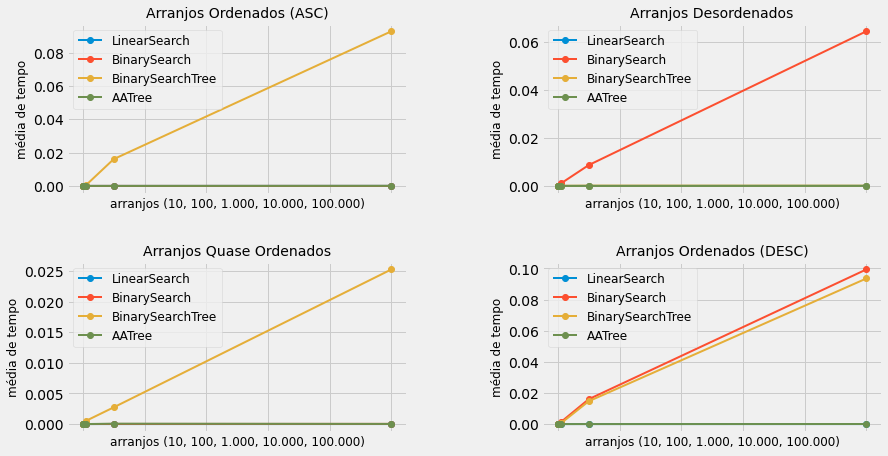

In [57]:
plot_result_not_balanced_mean('time', 'média de tempo', 'insert', ['LinearSearch', 'BinarySearch', 'BinarySearchTree', 'AATree'])

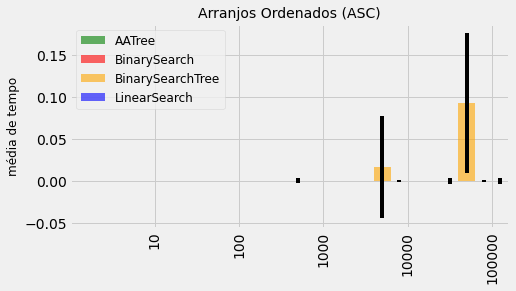

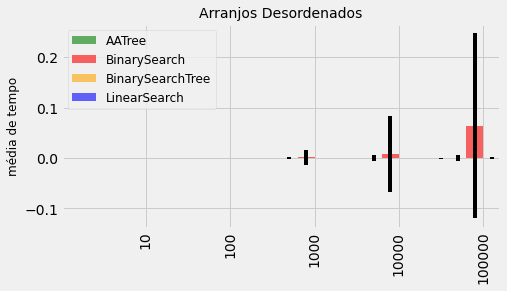

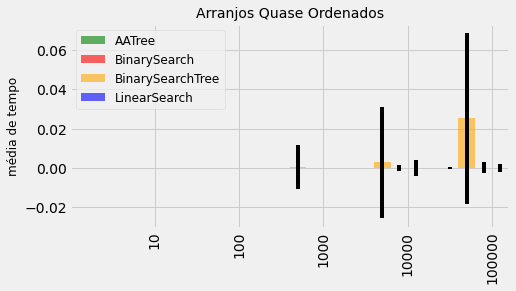

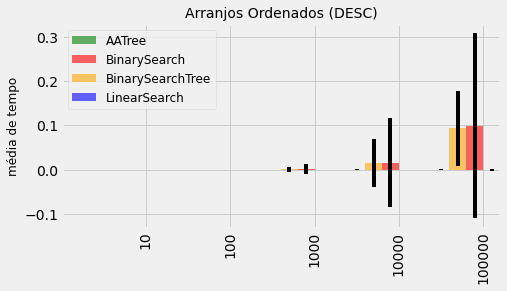

In [58]:
plot_result_not_balanced('time', 'média de tempo', 'insert')

Busca

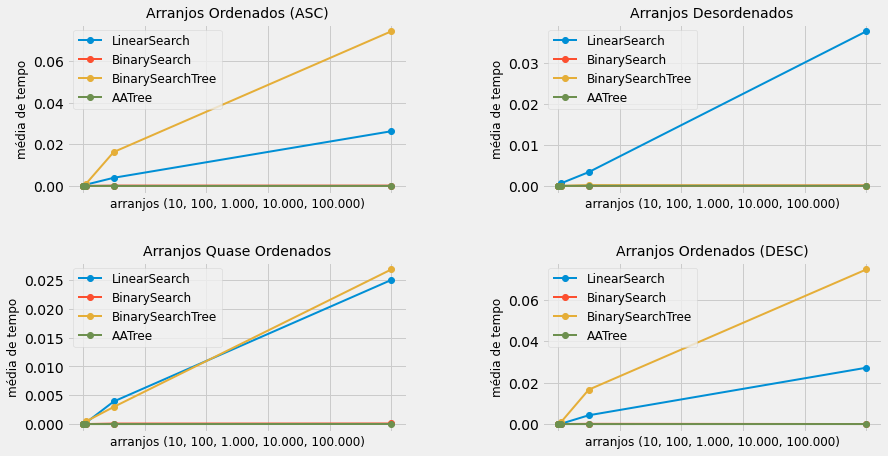

In [59]:
plot_result_not_balanced_mean('time', 'média de tempo', 'search', ['LinearSearch', 'BinarySearch', 'BinarySearchTree', 'AATree'])

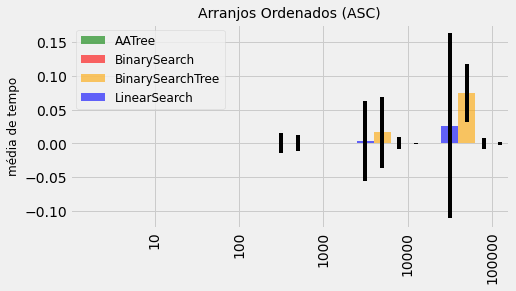

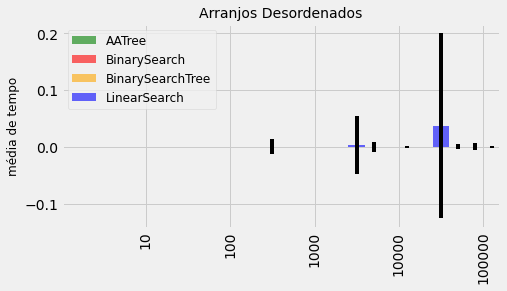

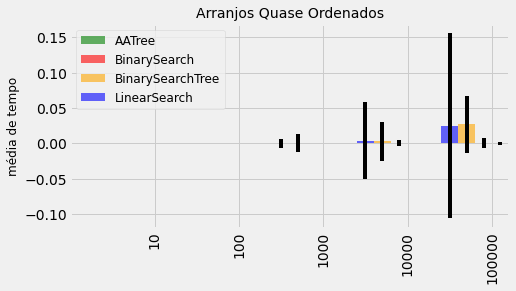

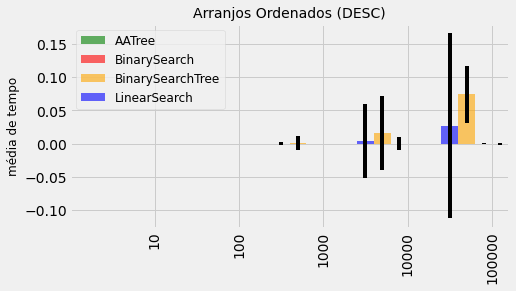

In [60]:
plot_result_not_balanced('time', 'média de tempo', 'search')

Remoção

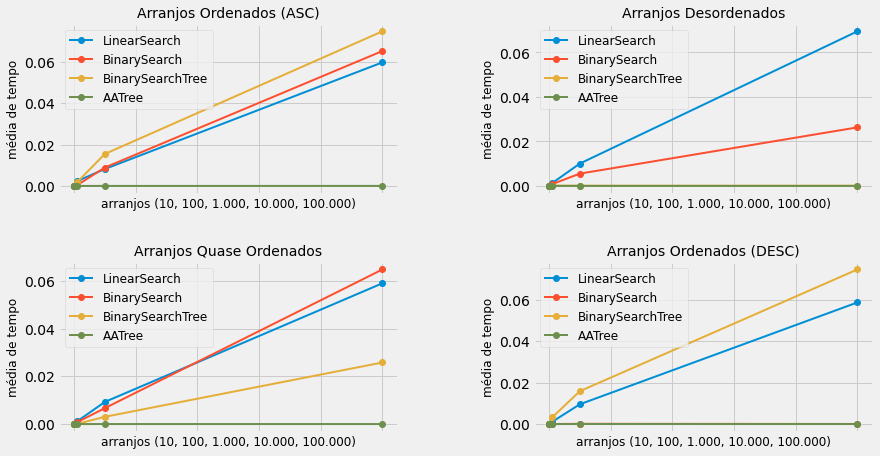

In [61]:
plot_result_not_balanced_mean('time', 'média de tempo', 'remove', ['LinearSearch', 'BinarySearch', 'BinarySearchTree', 'AATree'])

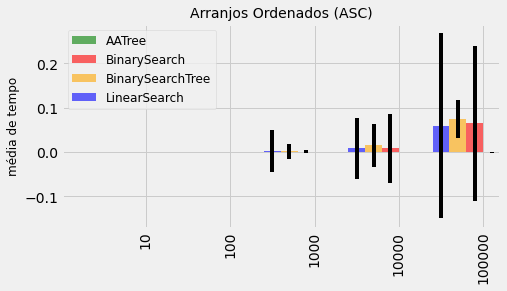

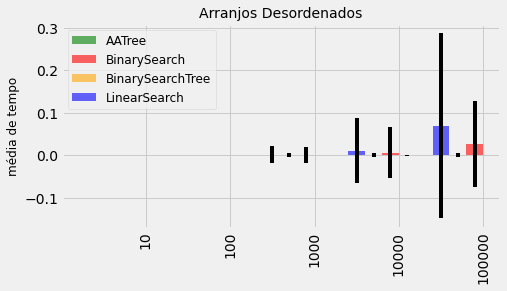

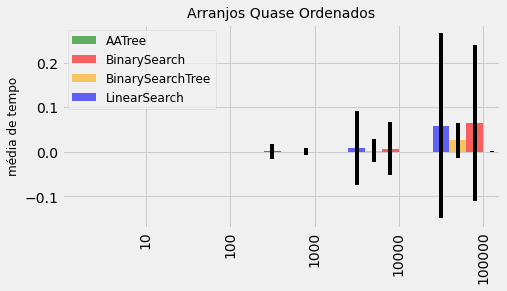

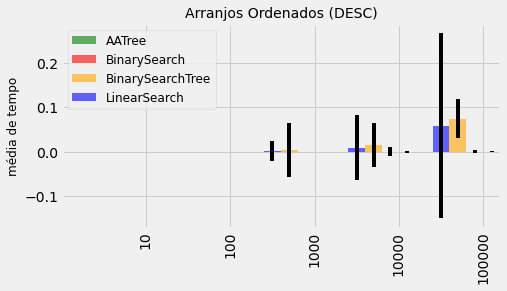

In [62]:
plot_result_not_balanced('time', 'média de tempo', 'remove')

### Comparações entre nós

Inserção

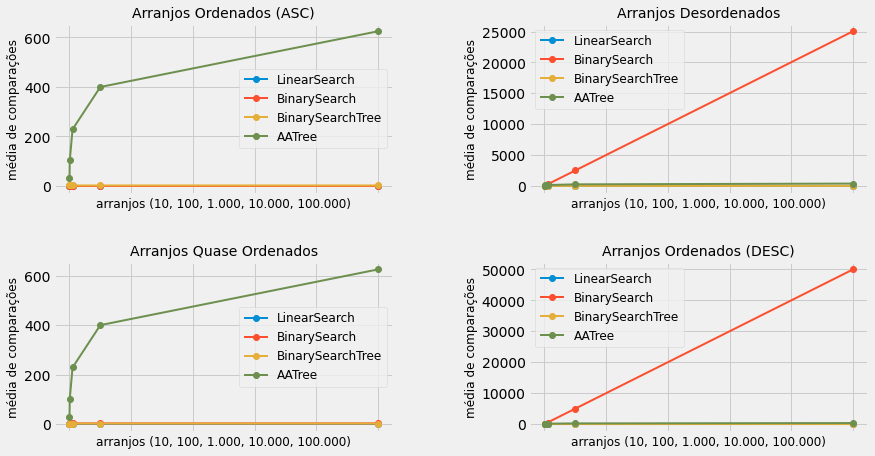

In [63]:
plot_result_not_balanced_mean('compare', 'média de comparações', 'insert', ['LinearSearch', 'BinarySearch', 'BinarySearchTree', 'AATree'])

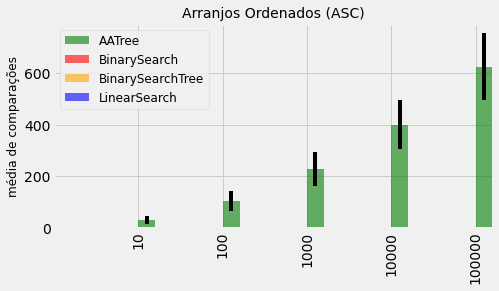

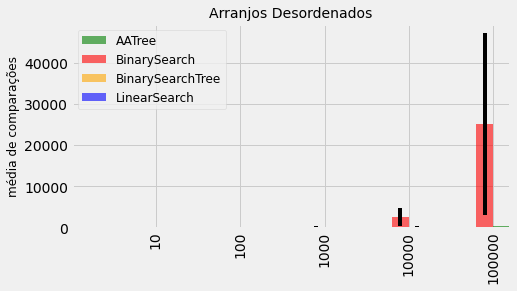

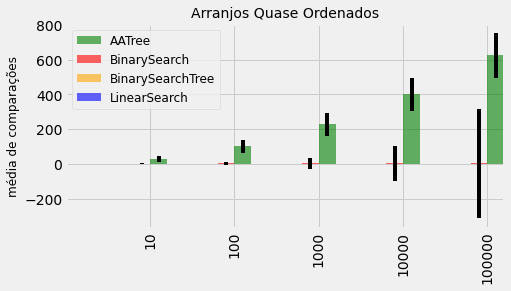

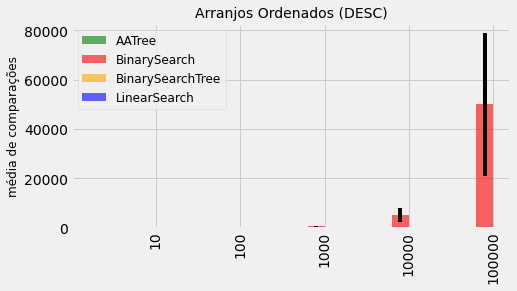

In [64]:
plot_result_not_balanced('compare', 'média de comparações', 'insert')

Busca

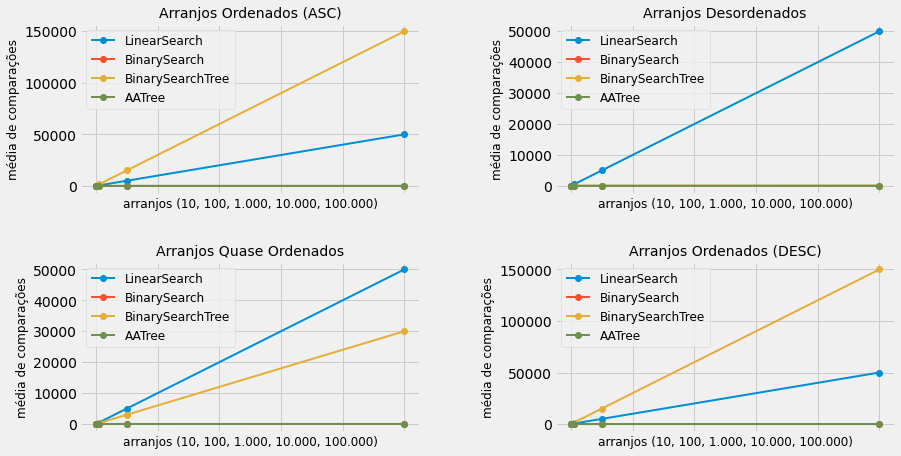

In [65]:
plot_result_not_balanced_mean('compare', 'média de comparações', 'search', ['LinearSearch', 'BinarySearch', 'BinarySearchTree', 'AATree'])

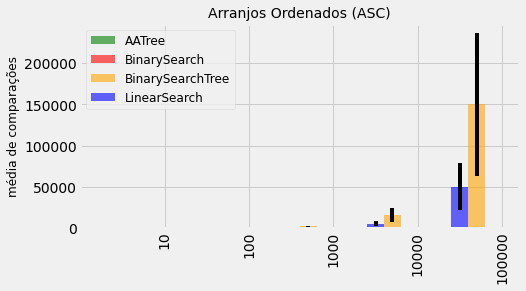

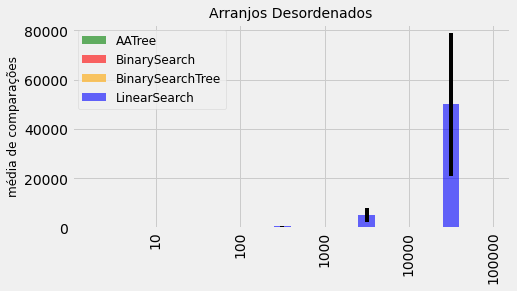

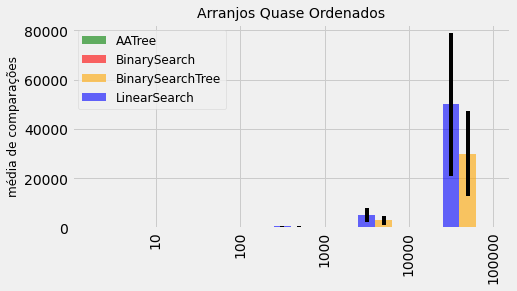

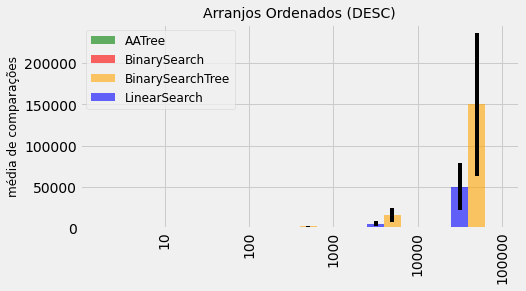

In [66]:
plot_result_not_balanced('compare', 'média de comparações', 'search')

Remoção

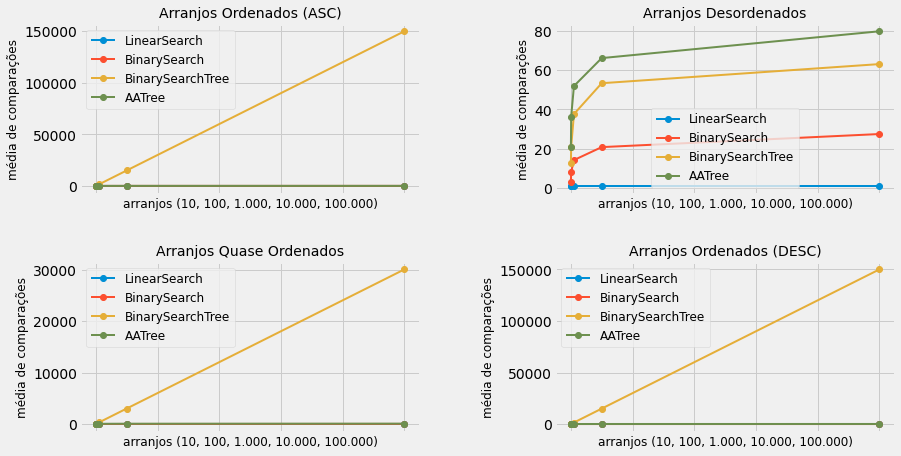

In [67]:
plot_result_not_balanced_mean('compare', 'média de comparações', 'remove', ['LinearSearch', 'BinarySearch', 'BinarySearchTree', 'AATree'])

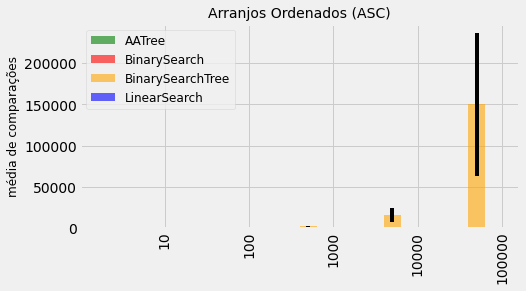

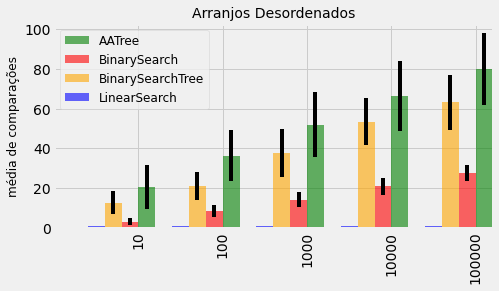

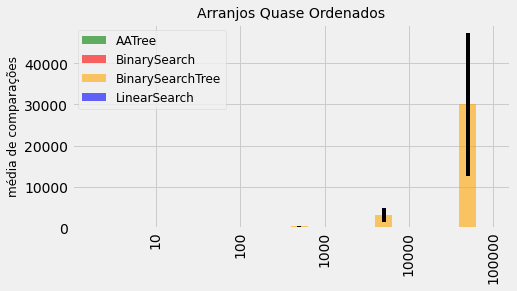

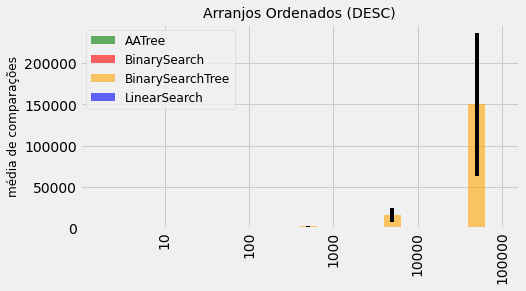

In [68]:
plot_result_not_balanced('compare', 'média de comparações', 'remove')

## Desempenho AATree (AVLTree, ReadBlackTree)

In [69]:
def plot_result_balanced(x, label='', action=''):
    for mode in modes:
        
        data =  df[(df['mode_vector'] == mode) & (df['type_action'] == action) & \
                   (df['type_search'] != 'LinearSearch') & (df['type_search'] != 'BinarySearch') & \
                   (df['type_search'] != 'BinarySearchTree')]
        
        data = data.pivot(index='len_vector', columns='type_search').stack().reset_index()
    
        fig, ax = plt.subplots() 
        fig.set_size_inches(7, 3.5)
        
        colors = ['orange', 'blue', 'red', 'green']
        positions = [0, 1, 2, 3]

        for group, color, pos in zip(data.groupby('type_search'), colors, positions):
            key, group = group
            group.plot('len_vector', 'mean_' + x, yerr='std_' + x, kind='bar', width=0.2, label=key, 
                        position=pos, color=color, alpha=0.6, ax=ax)  
        
        plt.title(mode, fontsize=14)
        plt.ylabel(label, fontsize=12)
        plt.xlabel('') 
        plt.legend(loc='upper left', prop={"size":12})
        ax.set_xlim(-1, 5.3)  

        plt.savefig(f"graphics/balanced_{x}_{action}_{mode}.png", format='png', bbox_inches='tight')

In [70]:
def plot_result_balanced_mean(x, label='', action='', searches=[]):
    plt.figure(figsize=(13, 7))
    graphics = 1

    for mode in modes:
        legend = []
        plt.subplot(2 , 2, graphics)

        for search in searches:
            data = df[(df['mode_vector'] == mode) & 
                      (df['type_search'] == search) &
                      (df['type_action'] == action)].sort_values(by=['len_vector'])
            legend.append(search)
            plt.subplots_adjust(hspace=0.4, wspace=0.4)
            plt.plot(len_vector, data['mean_' + x], marker='o', linewidth=2)
            
            plt.title(mode, fontsize=14)
            plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
            plt.xlabel('arranjos (10, 100, 1.000, 10.000, 100.000, 1.000.00)', fontsize=12) 
            plt.ylabel(label, fontsize=12) 
            plt.legend(legend, loc='best', prop={"size":12})
        graphics +=  1

    plt.savefig(f"graphics/balanced_mean_{x}_{action}.png", format='png')

### Tempo de Processamento

Inserção

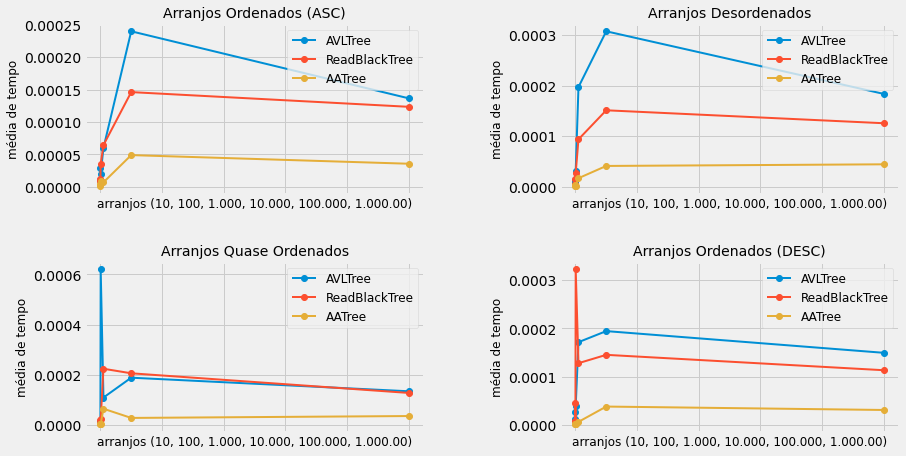

In [71]:
plot_result_balanced_mean('time', 'média de tempo', 'insert', ['AVLTree', 'ReadBlackTree', 'AATree'])

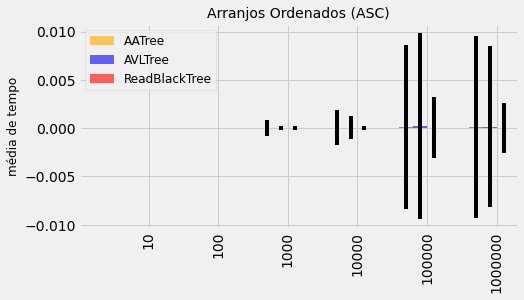

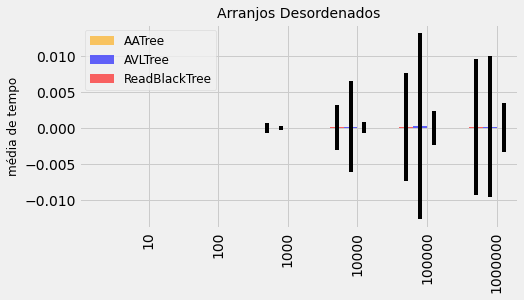

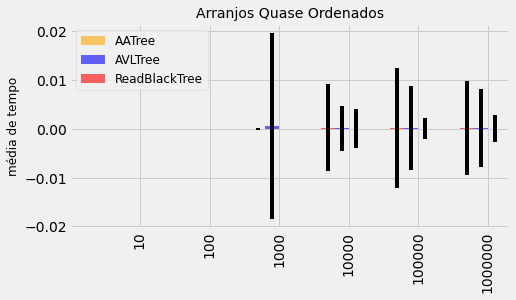

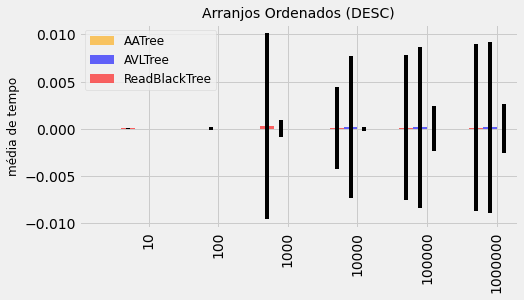

In [72]:
plot_result_balanced('time', 'média de tempo', 'insert')

Busca

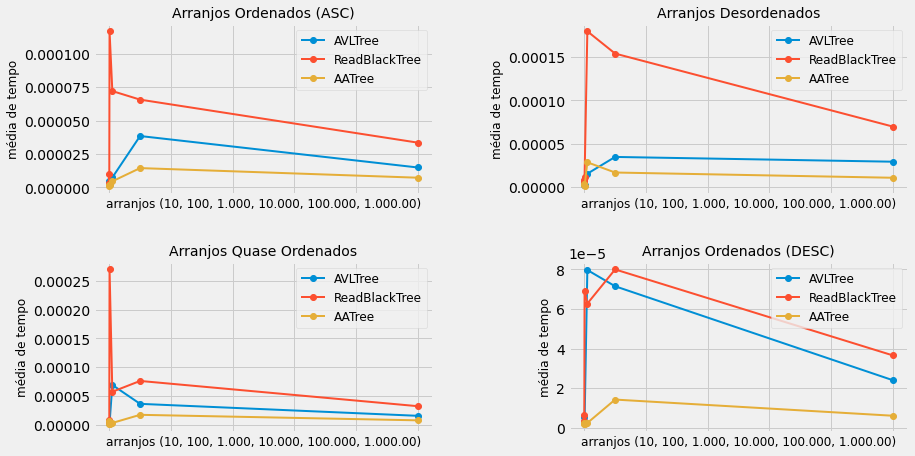

In [73]:
plot_result_balanced_mean('time', 'média de tempo', 'search', ['AVLTree', 'ReadBlackTree', 'AATree'])

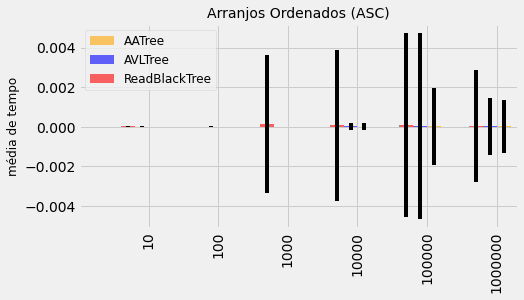

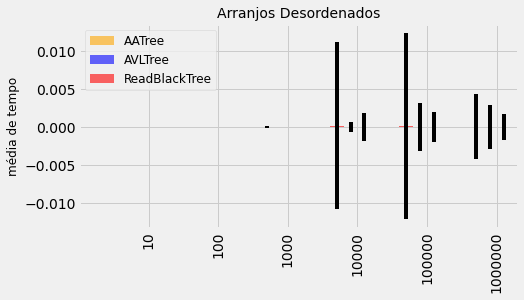

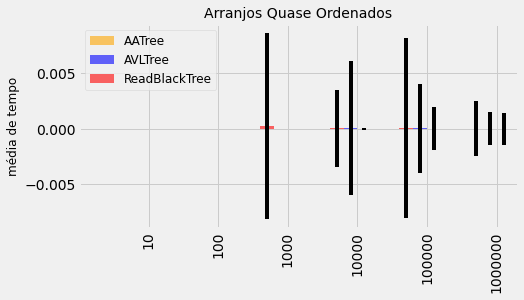

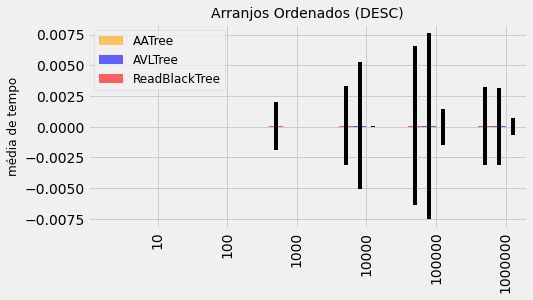

In [74]:
plot_result_balanced('time', 'média de tempo', 'search')

Remoção

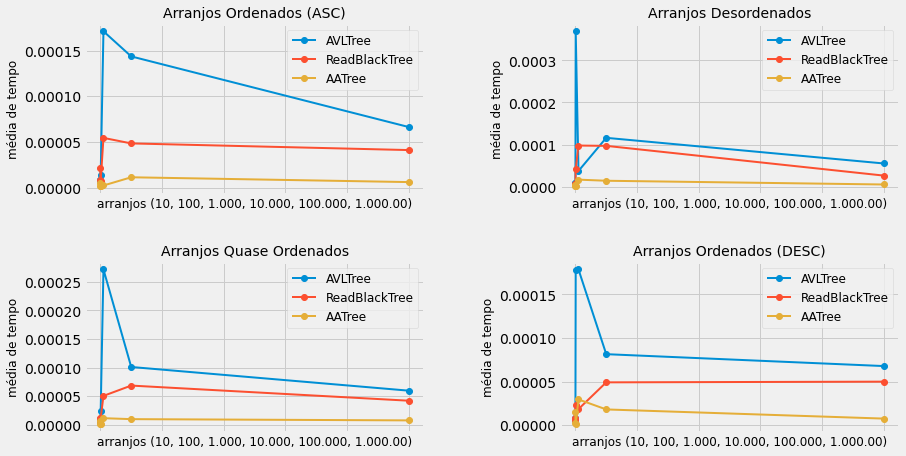

In [75]:
plot_result_balanced_mean('time', 'média de tempo', 'remove', ['AVLTree', 'ReadBlackTree', 'AATree'])

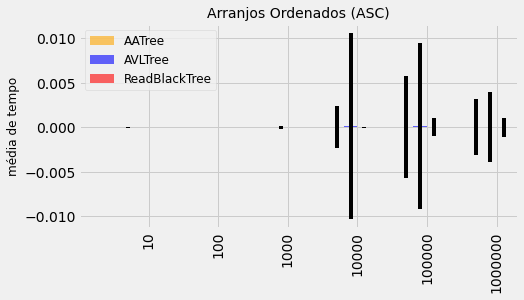

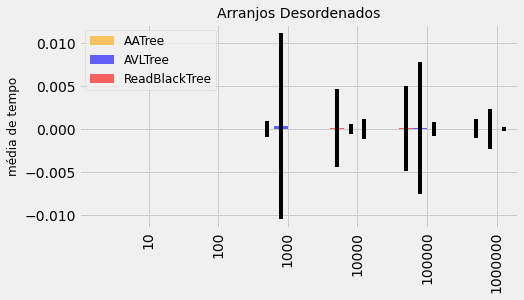

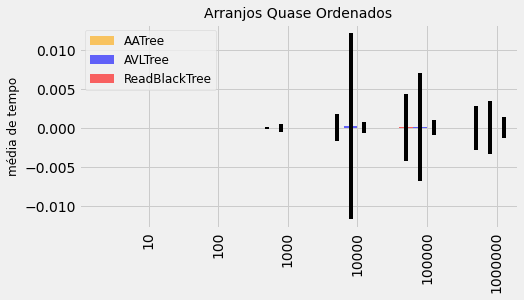

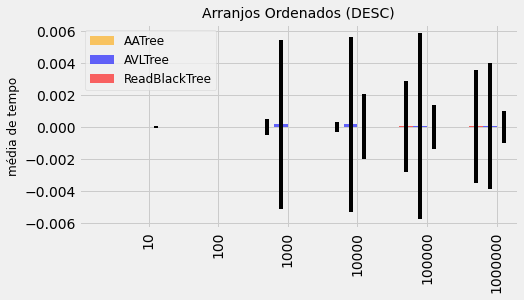

In [76]:
plot_result_balanced('time', 'média de tempo', 'remove')

### Comparações entre nós

Inserção

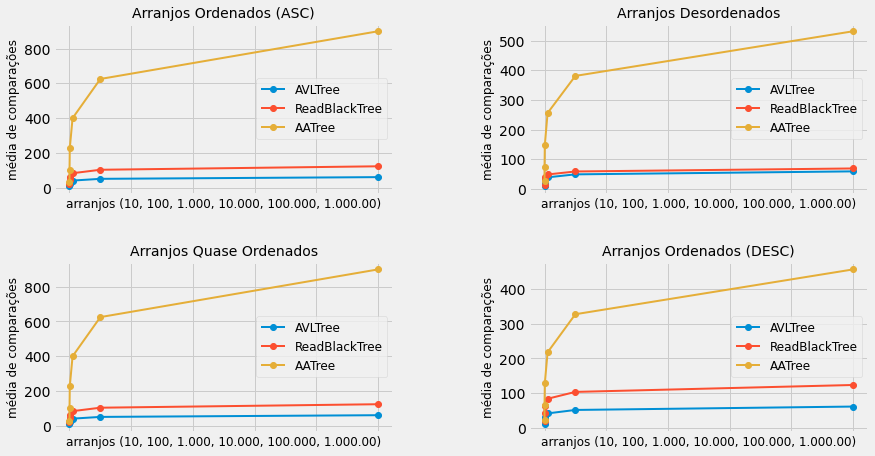

In [77]:
plot_result_balanced_mean('compare', 'média de comparações', 'insert', ['AVLTree', 'ReadBlackTree', 'AATree'])

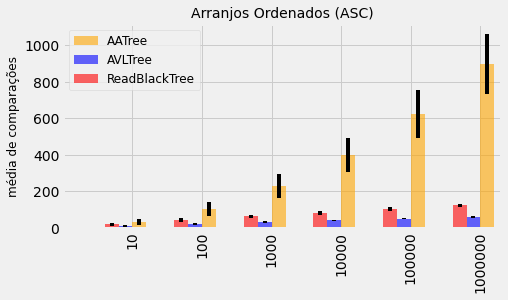

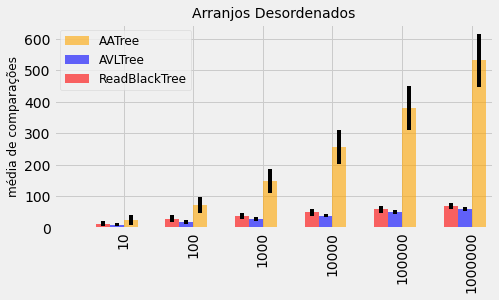

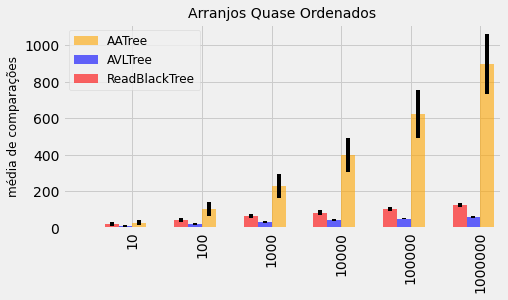

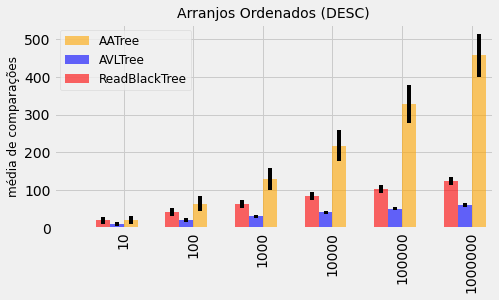

In [83]:
plot_result_balanced('compare', 'média de comparações', 'insert')

Busca

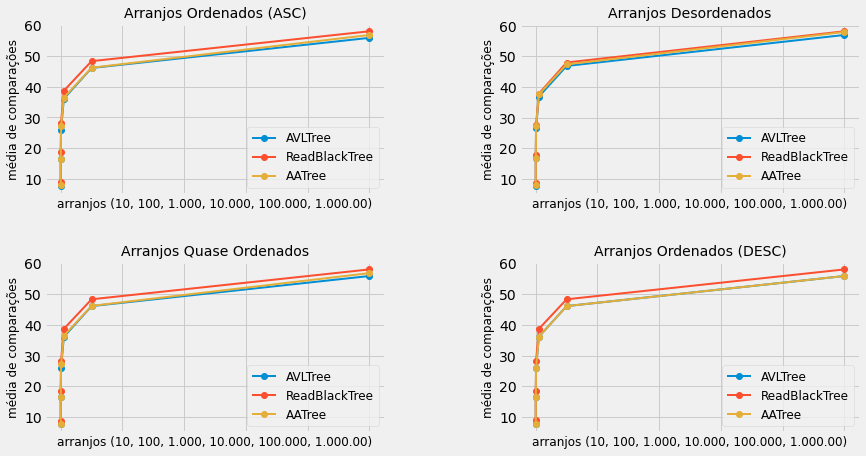

In [82]:
plot_result_balanced_mean('compare', 'média de comparações', 'search', ['AVLTree', 'ReadBlackTree', 'AATree'])

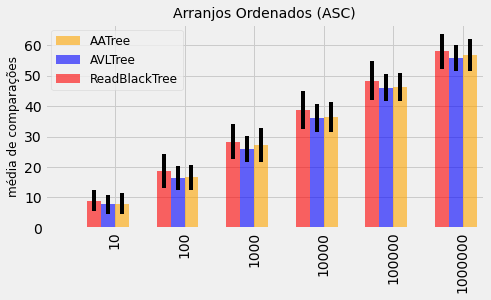

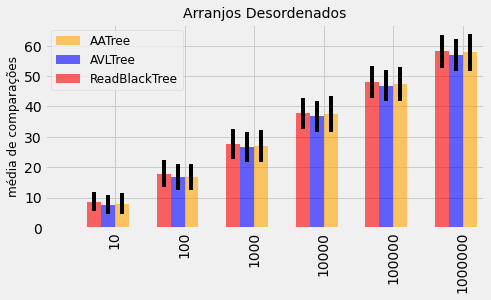

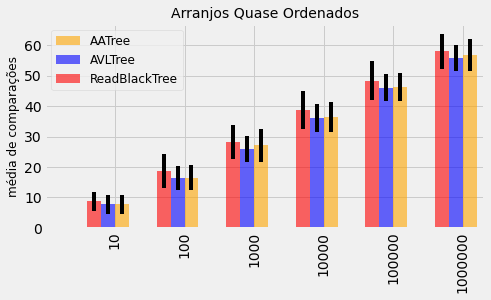

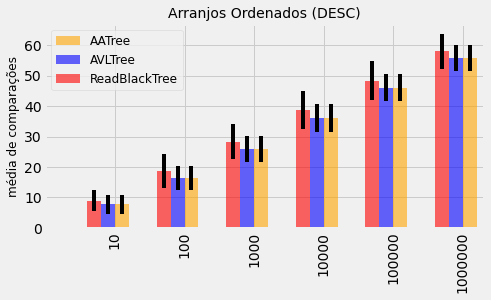

In [80]:
plot_result_balanced('compare', 'média de comparações', 'search')

Remoção

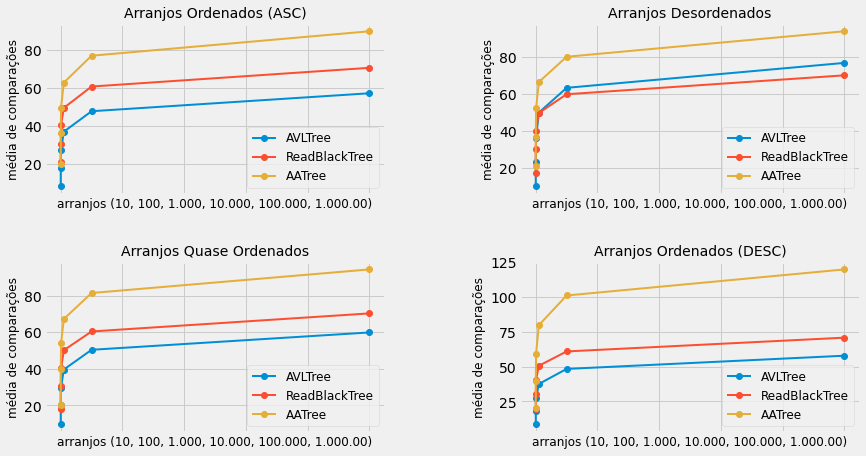

In [84]:
plot_result_balanced_mean('compare', 'média de comparações', 'remove', ['AVLTree', 'ReadBlackTree', 'AATree'])

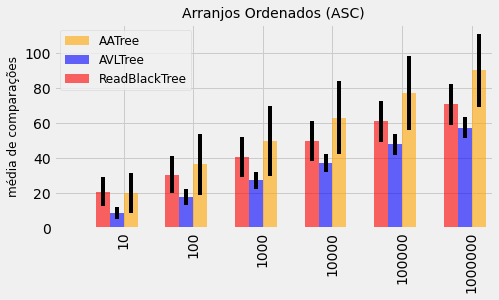

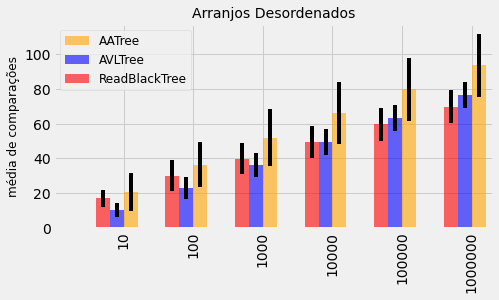

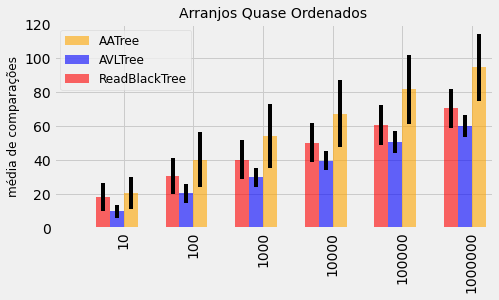

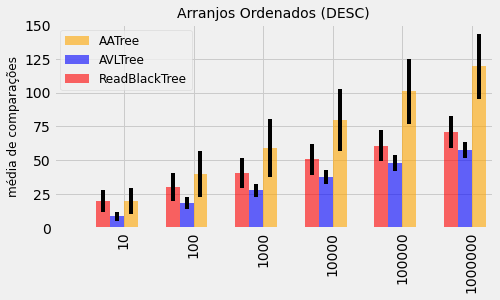

In [81]:
plot_result_balanced('compare', 'média de comparações', 'remove')

## Média das Métricas

Inserção

In [93]:
df[df['type_action'] == 'insert'] \
    .groupby(by=['type_search', 'mode_vector'], as_index=False) \
    .agg({"mean_time": "mean", "mean_compare": "mean", })

,type_search,mode_vector,mean_time,mean_compare
0,AATree,Arranjos Desordenados,0.000019,236.275112
1,AATree,Arranjos Ordenados (ASC),0.000018,381.039462
2,AATree,Arranjos Ordenados (DESC),0.000014,202.707667
3,AATree,Arranjos Quase Ordenados,0.000023,380.676031
4,AVLTree,Arranjos Desordenados,0.000123,34.416293
5,AVLTree,Arranjos Ordenados (ASC),0.000083,35.863912
6,AVLTree,Arranjos Ordenados (DESC),0.000099,35.863912
7,AVLTree,Arranjos Quase Ordenados,0.000179,35.995344
8,BinarySearch,Arranjos Desordenados,0.014794,5570.427074
9,BinarySearch,Arranjos Ordenados (ASC),0.000010,1.000000


Busca

In [94]:
df[df['type_action'] == 'search'] \
    .groupby(by=['type_search', 'mode_vector'], as_index=False) \
    .agg({"mean_time": "mean", "mean_compare": "mean", })

,type_search,mode_vector,mean_time,mean_compare
0,AATree,Arranjos Desordenados,0.000010,32.439783
1,AATree,Arranjos Ordenados (ASC),0.000005,31.843463
2,AATree,Arranjos Ordenados (DESC),0.000005,31.345502
3,AATree,Arranjos Quase Ordenados,0.000006,31.780734
4,AVLTree,Arranjos Desordenados,0.000015,31.950412
5,AVLTree,Arranjos Ordenados (ASC),0.000012,31.345502
6,AVLTree,Arranjos Ordenados (DESC),0.000031,31.345502
7,AVLTree,Arranjos Quase Ordenados,0.000022,31.351008
8,BinarySearch,Arranjos Desordenados,0.000026,17.295824
9,BinarySearch,Arranjos Ordenados (ASC),0.000065,20.563668


Remoção

In [95]:
df[df['type_action'] == 'remove'] \
    .groupby(by=['type_search', 'mode_vector'], as_index=False) \
    .agg({"mean_time": "mean", "mean_compare": "mean", })

,type_search,mode_vector,mean_time,mean_compare
0,AATree,Arranjos Desordenados,0.000007,58.107202
1,AATree,Arranjos Ordenados (ASC),0.000005,55.998902
2,AATree,Arranjos Ordenados (DESC),0.000012,69.882947
3,AATree,Arranjos Quase Ordenados,0.000007,59.600321
4,AVLTree,Arranjos Desordenados,0.000099,43.090538
5,AVLTree,Arranjos Ordenados (ASC),0.000068,32.594608
6,AVLTree,Arranjos Ordenados (DESC),0.000087,33.076090
7,AVLTree,Arranjos Quase Ordenados,0.000079,34.963983
8,BinarySearch,Arranjos Desordenados,0.006530,14.727924
9,BinarySearch,Arranjos Ordenados (ASC),0.014888,15.547748
